In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [2]:
df = pd.DataFrame()
df = pd.read_csv('train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#filling unfilled values ...
#now filling data for numerical attributes using mean
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB


In [8]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [9]:
df.isna().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
#filling values for categorical data using mode 
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [11]:
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [12]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


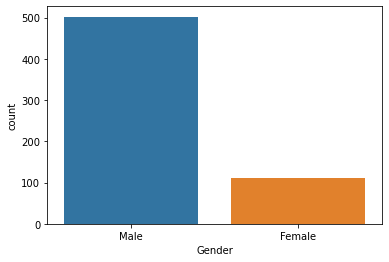

In [14]:
sns.countplot(df['Gender'])

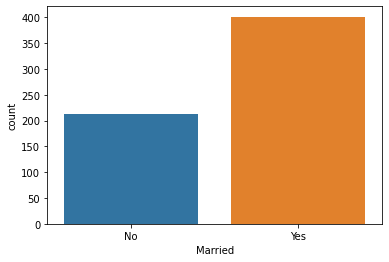

In [15]:
sns.countplot(df['Married'])

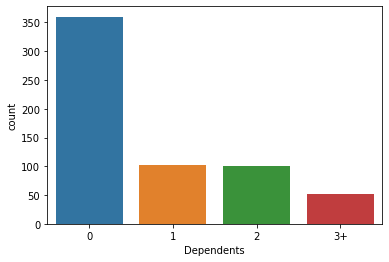

In [16]:
sns.countplot(df['Dependents'])

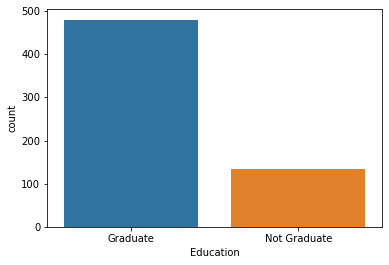

In [17]:
sns.countplot(df['Education'])

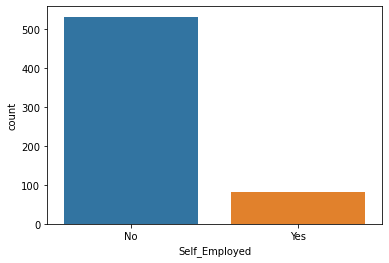

In [18]:
sns.countplot(df['Self_Employed'])

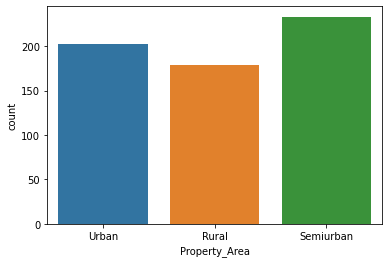

In [19]:
sns.countplot(df['Property_Area'])

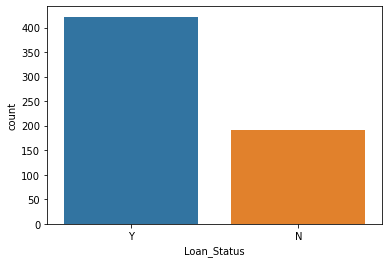

In [20]:
sns.countplot(df['Loan_Status'])

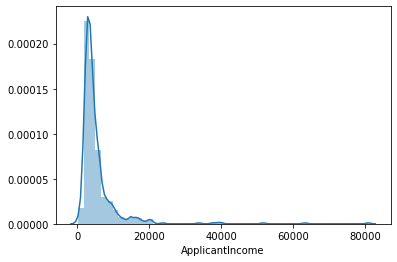

In [21]:
#Data visualization for numerical attributes
sns.distplot(df['ApplicantIncome'])

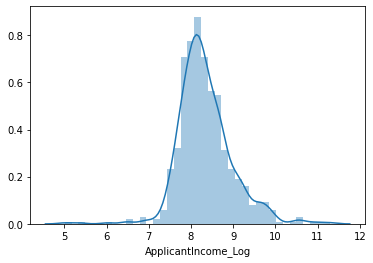

In [22]:
#since the data is left skewed which is not preferable for model prediction..so applying log transformation
df['ApplicantIncome_Log'] = np.log(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncome_Log'])

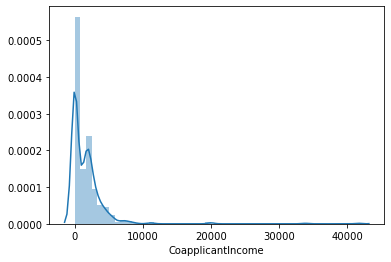

In [23]:
sns.distplot(df['CoapplicantIncome'])

In [24]:
df['CoapplicantIncome_Log'] = np.log(df['CoapplicantIncome'])

c:\Users\rahul\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


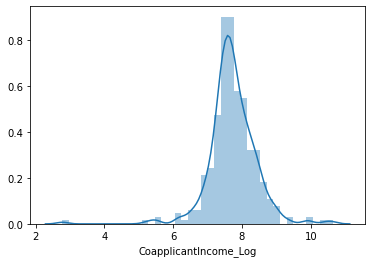

In [81]:
df['CoapplicantIncome_Log'].replace([np.inf,-np.inf],np.nan,inplace=True)
sns.distplot(df['CoapplicantIncome_Log'].dropna())

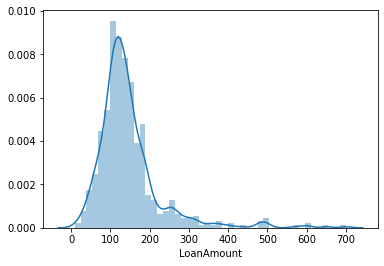

In [25]:
sns.distplot(df['LoanAmount'])

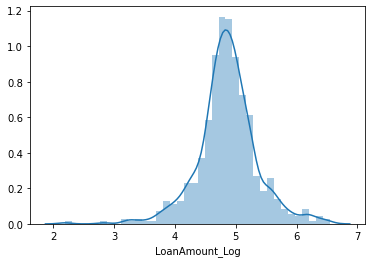

In [26]:
#it is somewhat left-skewed so we have to apply transformation
df['LoanAmount_Log'] = np.log(df['LoanAmount'])
sns.distplot(df['LoanAmount_Log'])

c:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


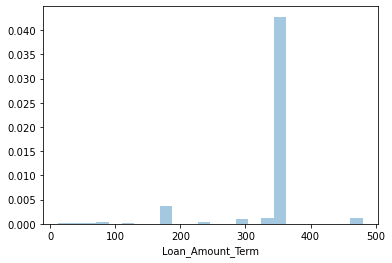

In [28]:
sns.distplot(df['Loan_Amount_Term'])

c:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


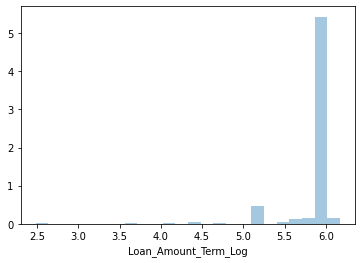

In [30]:
#since the graph is not left-skewed but the difference between values are much larger so for that we are transforming dataset
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df['Loan_Amount_Term_Log'])

c:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


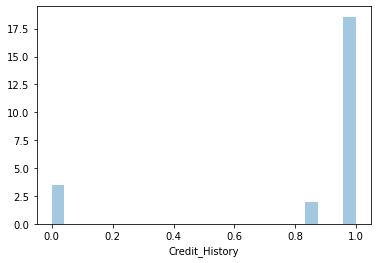

In [31]:
#since the values resides only between 0-1 so no need to transform
sns.distplot(df['Credit_History'])

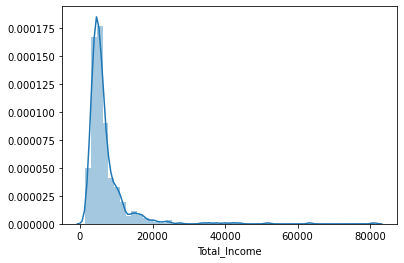

In [32]:
sns.distplot(df['Total_Income'])

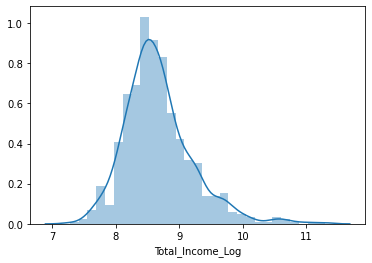

In [33]:
df['Total_Income_Log'] = np.log(df['Total_Income'])
sns.distplot(df['Total_Income_Log'])

In [34]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncome_Log,CoapplicantIncome_Log,LoanAmount_Log,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,-inf,4.986426,5.886104,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,7.318540,4.852030,5.886104,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,-inf,4.189655,5.886104,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,7.765569,4.787492,5.886104,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,-inf,4.948760,5.886104,8.699515


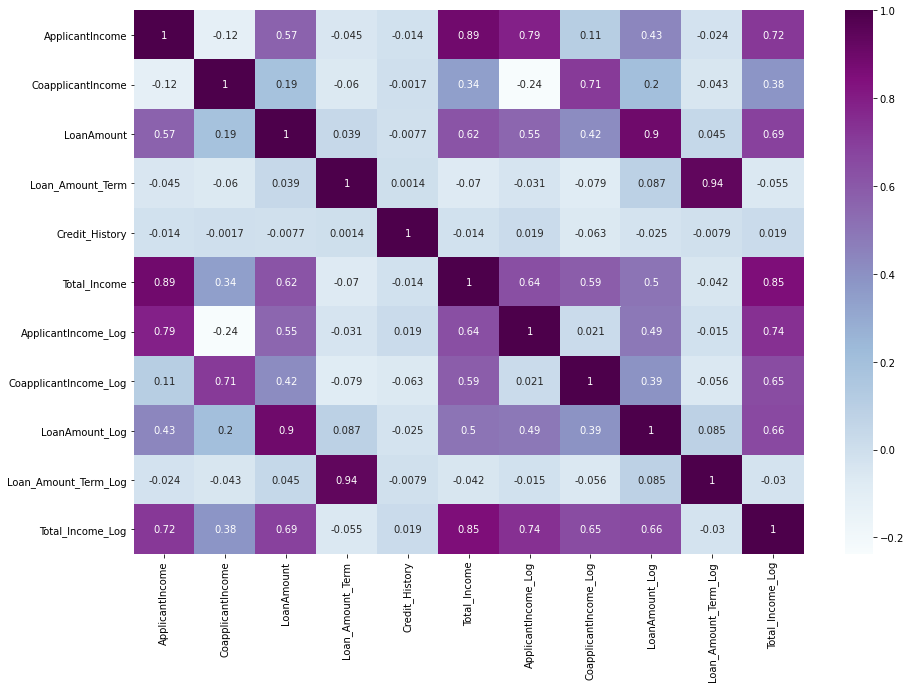

In [35]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap="BuPu")

In [36]:
#dropping unncessary columns for better accuracy
cols = ['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','CoapplicantIncome_Log']
df = df.drop(columns=cols,axis=1)

In [37]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Log,LoanAmount_Log,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                614 non-null    object 
 1   Married               614 non-null    object 
 2   Dependents            614 non-null    object 
 3   Education             614 non-null    object 
 4   Self_Employed         614 non-null    object 
 5   Credit_History        614 non-null    float64
 6   Property_Area         614 non-null    object 
 7   Loan_Status           614 non-null    object 
 8   ApplicantIncome_Log   614 non-null    float64
 9   LoanAmount_Log        614 non-null    float64
 10  Loan_Amount_Term_Log  614 non-null    float64
 11  Total_Income_Log      614 non-null    float64
dtypes: float64(5), object(7)
memory usage: 40.8+ KB


In [39]:
#Now encoding the Attribute with Categorical data into numerical format
cols = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [40]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_Log,LoanAmount_Log,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104,8.699515


In [41]:
X = df.drop(['Loan_Status'])
y = df['Loan_Status']

In [42]:
#Perfroming Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [43]:
from sklearn.model_selection import cross_val_score
def classify_model(model,x,y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    model.fit(x_train,y_train)
    print("Model Accuracy: ",model.score(x_test,y_test)*100)
    #Cross Validating the Accuracy
    score = cross_val_score(model,x,y,cv=5)
    print("Cross Validation of Model: ",np.mean(score)*100)

In [44]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify_model(model,X,y)

Model Accuracy:  78.86178861788618
Cross Validation of Model:  80.9462881514061


In [45]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify_model(model,X,y)

Model Accuracy:  71.54471544715447
Cross Validation of Model:  70.19858723177396


In [46]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
classify_model(model,X,y)

Model Accuracy:  78.04878048780488
Cross Validation of Model:  79.31627349060376


In [47]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
classify_model(model,X,y)

Model Accuracy:  71.54471544715447
Cross Validation of Model:  75.56977209116353
